AttributeError: 'NoneType' object has no attribute 'cdf'

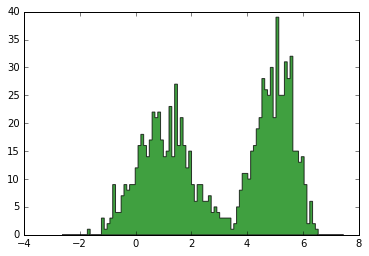

In [43]:
%matplotlib inline

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# For statsmodel method
import statsmodels.api as sm

# For scipy method
from scipy import stats
from functools import partial

# Data loading
dataset = np.loadtxt('dataset1.txt')

# Base histogram & plotting ---------------------------------------
"""not sure what is histtype="stepsize" """
n0, bins0, patches0=plt.hist(dataset,100,normed=0,range=(min(dataset)-1,max(dataset)+1),histtype='stepfilled')
plt.setp(patches0, 'facecolor', 'g', 'alpha', 0.75)

# Bandwidth generation techniques (only Scott so far)
def my_kde_bandwidth(obj, fac=1./5):
    """We use Scott's Rule, multiplied by a constant factor."""
    return np.power(obj.n, -1./(obj.d+4)) * fac
#------------------------------------------------------------------

# KDE Generator
""" Add bandwidth and method parameters to this"""
def calcKDE(data):
    #Calculating KDE
    kde1 = sm.nonparametric.KDEUnivariate(data)
    kde = kde1.fit(kernel='gau', bw='silverman')
    return kde

# Shows given KDE with given data
"""interpolated_data = np.linspace(data.min() - 1, data.max() + 1, 1000)"""
def showKDE(data, kde):
    plt.plot(data, kde.evaluate(data), 'b-')
    plt.show()
    
def func(x):
    u = np.random.random()
    kde1 = sm.nonparametric.KDEUnivariate(dataset)
    kde = kde1.fit(kernel='gau', bw='silverman')
    return kde.cdf([x]) - u

# Generates random data based on 
def generateData(data, kde):
#     inverseCdf = kde.icdf
#     randomSet = np.random.random(1) * inverseCdf
    
    sample_x = brentq(func, -99999999, 99999999)  # read brentq-docs about these constants # constants need to be sign-changing for the function
    return sample_x


interpolated_data = np.linspace(dataset.min() - 1, dataset.max() + 1, 1000)
shubham = calcKDE(dataset)
new_data = generateData(dataset, shubham)
print(new_data)